# View files

Now that we have the raw images and the raw labels, we can start viewing each file to see whether they look correct or additional data is needed. To view these files, we will use napari and torchio and some other dependencies which we will load in below.

In [1]:
import napari
import torchio as tio
import os
from pathlib import Path
import numpy as np

In [2]:
img_dir = '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/'
label_dir = '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/'

In [3]:
imgs = []
labels = []

for file in os.listdir(img_dir):
    if file.endswith('.nii'):
        imgs.append(img_dir + file)
        
for file in os.listdir(label_dir):
    if file.endswith('.nii'):
        labels.append(label_dir + file)

In [4]:
imgs[:5]

['//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/Paraphronima_head_05_FEG200130_102.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/Vibilia_FEG191112_081_blurrya.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/streetsia_20180409.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/Phronima_01_head_sp_5_USNM1450842.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_images/FEG191028_078_dcm.nii']

In [5]:
labels[:5]

['//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/Paraphronima_head_05_FEG200130_102.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/streetsia_20180409.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/psyllid_20190906_female_eye.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/phronima_20180403.nii',
 '//mnt/d37c99c5-3b94-47b9-9965-c66fd9a16e23/jake/mctnet_data/raw_labels/dampieri_20200218_male_left_1676.nii']

Let's find the imgs and labels with matching pairs and put the filename of these in a variable called `filenames`.

In [6]:
imgs_p = []
for img in imgs:
    imgs_p.append(Path(img).stem)
    
labels_p = []
for label in labels:
    labels_p.append(Path(label).stem)
    
filenames = sorted(list(set(imgs_p) & set(labels_p)))

In [7]:
print(f'Found {len(filenames)} labelled images for analysis')

Found 38 labelled images for analysis


Load all of the subjects

In [8]:
subjects_list = []

for filename in filenames:
    subject = tio.Subject(
        image=tio.ScalarImage(img_dir + filename + '.nii'),
        label=tio.LabelMap(label_dir + filename + '.nii'),
        filename=filename
    )
    subjects_list.append(subject)

subjects = tio.SubjectsDataset(subjects_list)

To make sure that these files are how we intended them to be, let's print some details about each. 

In [9]:
    # with open('scan_info.csv', 'w') as f:
    # for subject in subjects_list:
    #     print(
    #         f'Subject name: {subject.filename} \n \
    #         Image shape: {subject.image.shape} \n \
    #         Image spacing: {subject.image.spacing} \n \
    #         Image spatial shape: {subject.image.spatial_shape} \n \
    #         Image affine : {subject.image.affine} \n \
    #         Image bounds : {subject.image.get_bounds()} \n \
    #         Image itemsize : {subject.image.itemsize} \n \
    #         Image num_channels : {subject.image.num_channels} \n \
    #         Image oritentation : {subject.image.orientation} \n \
    #         Image min : {np.min(subject.image)}, max:{np.max(subject.image)} \n \
    #         ____ \n \
    #         Label shape: {subject.label.shape} \n \
    #         Label spacing: {subject.label.spacing} \n \
    #         Label spatial shape: {subject.label.spatial_shape} \n \
    #         Label affine : {subject.label.affine} \n \
    #         Label bounds : {subject.label.get_bounds()} \n \
    #         Label itemsize : {subject.label.itemsize} \n \
    #         Label num_channels : {subject.label.num_channels} \n \
    #         Label oritentation : {subject.label.orientation} \n \
    #         Label min : {np.min(subject.label)}, max:{np.max(subject.label)} \n \
    #         \n \
    #     ',
    #     file=f)

Let's plot an image to see if it looks ok

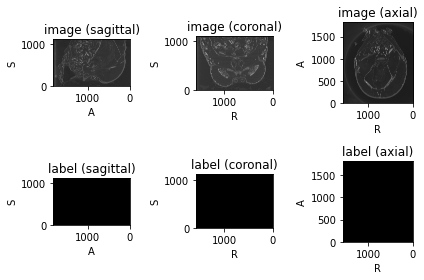

In [10]:
sample = subjects[0]
sample.load()
sample.plot()

These files are huge, so let's crop them down to small patches of size 256x256x256 and then plot them to see if they look ok.
We will use the LabelSampler from torchio to do this, so we can inspect areas around where labels have been made.

In [12]:
viewer = napari.Viewer()
viewer.dims.ndisplay = 3 # toggle 3 dimensional view
viewer.add_image(sample['image'].data.numpy())
viewer.add_image(sample['label'].data.numpy())